# Thinh Nguyen
# Dr Olenick
# Comp Phys Exam 3
# 11/18/2022

time to reach the ground when there is no spin: 28.252000000011545s
distance travelled in the x direction with no spin 0.0m


C:\Users\14694\AppData\Local\Temp\ipykernel_14020\2084287394.py:88: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


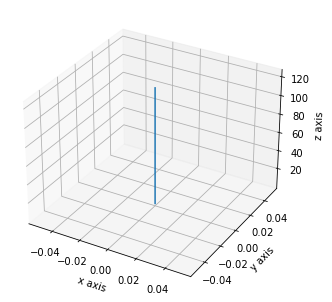

In [6]:


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

omega = 0 #spin speed in rev/min
#init param
g = 9.81
v0 = 0 #m/s
x = 0
y = 0 #init position
t = 0 #time
h = 0.001 #time step (dt)
theta = 0 #angle of projection (degree)
z = 125
phi =  -np.pi/4 #45 degree -np.pi/2 for homework 6 last question
#create array to store data, new value will be appended
tc = np.zeros(0)
xc = np.zeros(0)
yc = np.zeros(0)
zc = np.zeros(0)

#drag coefficient--------------------------------
k_D = 0.49
k_l = 0.07
#------------------------------------------------

#define acceleration func------------------------
def ax(vx,vy,vz,v):
    return 0 #-k_D*v*vx + k_l*(omega*np.sin(phi)*vz - omega*np.cos(phi)*vy)
def ay(vx,vy,v):
    return 0 #-k_D*v*vy + k_l*omega*vx*np.cos(phi)
def az(vx,vz,v):
    return -k_D*v*vz - k_l*omega*vx*np.sin(phi) - g
#------------------------------------------------

#define Heun's method----------------------------
def heun_vx(vx,vy,vz,v):
    heun_end = vx + ax(vx,vy,vz,v)*h
    vx = vx + (ax(vx,vy,vz,v)+ ax(heun_end,vy,vz,v))/2*h
    return vx
def heun_vy(vx,vy,v):
    heun_end = vy + az(vx,vy,v)*h
    vy = vy + (ay(vx,vy,v)+ ay(vx,heun_end,v))/2*h
    return vy
def heun_vz(vx,vz,v):
    heun_end = vz + az(vx,vz,v)*h
    vz = vz + (az(vx,vz,v)+ az(vx,heun_end,v))/2*h
    return vz
#------------------------------------------------

#define heun's method for y----------------------
def heun_x(x,vx):
    x = x + vx*h
    return x
def heun_y(y,vy):
    y = y + vy*h
    return y
def heun_z(z,vz):
    z = z + vz*h
    return z

#------------------------------------------------
vx = 0
vz = 0
v = 0
vy = 0

#iterate over time-------------------------------
while z>=0:
    xc = np.append(xc,x)
    yc = np.append(yc,y)
    zc = np.append(zc,z)
    tc = np.append(tc,t)
   
    vx = heun_vx(vx,vy,vz,v)
    x = heun_x(x,vx)
   
    vy = heun_vy(vx,vy,v)
    y = heun_y(y,vy)
   
    vz = heun_vz(vx,vz,v)
    z = heun_z(z,vz)
    v = np.sqrt(vx**2 + vy**2 + vz**2) #update value of velocity
    t = t + h
 
#plot in 3D-------------------------------------
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.plot(xc,yc,zs = zc, zdir='z')
print("time to reach the ground when there is no spin:",str(tc[np.argmax(tc)]) +"s" )
print("distance travelled in the x direction with no spin",str(xc[np.argmax(xc)]) + "m")

time to reach the ground when there is a spin of 6.28 rad/s: 28.65700000001204s
distance travelled in the x direction with spin 17.19751827414257m


C:\Users\14694\AppData\Local\Temp\ipykernel_14020\4272408006.py:88: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


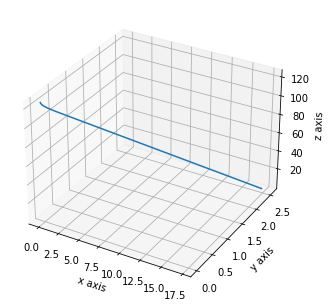

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

omega = 6.28 #spin speed of 6.28 rad/s 
#init param
g = 9.81
v0 = 0 #m/s
x = 0
y = 0 #init position
t = 0 #time
h = 0.001 #time step (dt)
theta = 0 #angle of projection (degree)
z = 125
phi = -np.pi/4 #45 degree -np.pi/4
#create array to store data, new value will be appended
tc = np.zeros(0)
xc = np.zeros(0)
yc = np.zeros(0)
zc = np.zeros(0)

#drag coefficient--------------------------------
k_D = 0.49
k_l = 0.07
#------------------------------------------------

#define acceleration func------------------------
def ax(vx,vy,vz,v):
    return -k_D*v*vx + k_l*(omega*np.sin(phi)*vz - omega*np.cos(phi)*vy)
def ay(vx,vy,v):
    return -k_D*v*vy + k_l*omega*vx*np.cos(phi)
def az(vx,vz,v):
    return -k_D*v*vz - k_l*omega*vx*np.sin(phi) - g
#------------------------------------------------

#define Heun's method----------------------------
def heun_vx(vx,vy,vz,v):
    heun_end = vx + ax(vx,vy,vz,v)*h
    vx = vx + (ax(vx,vy,vz,v)+ ax(heun_end,vy,vz,v))/2*h
    return vx
def heun_vy(vx,vy,v):
    heun_end = vy + az(vx,vy,v)*h
    vy = vy + (ay(vx,vy,v)+ ay(vx,heun_end,v))/2*h
    return vy
def heun_vz(vx,vz,v):
    heun_end = vz + az(vx,vz,v)*h
    vz = vz + (az(vx,vz,v)+ az(vx,heun_end,v))/2*h
    return vz
#------------------------------------------------

#define heun's method for y----------------------
def heun_x(x,vx):
    x = x + vx*h
    return x
def heun_y(y,vy):
    y = y + vy*h
    return y
def heun_z(z,vz):
    z = z + vz*h
    return z

#------------------------------------------------
vx = 0
vz = 0
v = 0
vy = 0

#iterate over time-------------------------------
while z>=0:
    xc = np.append(xc,x)
    yc = np.append(yc,y)
    zc = np.append(zc,z)
    tc = np.append(tc,t)
   
    vx = heun_vx(vx,vy,vz,v)
    x = heun_x(x,vx)
   
    vy = heun_vy(vx,vy,v)
    y = heun_y(y,vy)
   
    vz = heun_vz(vx,vz,v)
    z = heun_z(z,vz)
    v = np.sqrt(vx**2 + vy**2 + vz**2) #update value of velocity
    t = t + h
 
#plot in 3D-------------------------------------
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.plot(xc,yc,zs = zc, zdir='z')
print("time to reach the ground when there is a spin of 6.28 rad/s:",str(tc[np.argmax(tc)]) + "s")
print("distance travelled in the x direction with spin",str(xc[np.argmax(xc)]) + "m")

In [5]:
GlowScript 3.2 VPython
#define constant
G = 6.67E-11  #gravitational constant
AU = 1.5E11  #one Astronomical Unit= Earth-Sun distance
YEAR = 365.25*24*60*60
RE = 6.378E6   #radius of Earth in meters

#create objects
scene = canvas(title = 'Satellite Orbit', background = color.white)
Earth = sphere(pos = vec(0,0,0), radius = RE, mass = 6E24, texture = textures.earth)
satellite = sphere(pos = vec(1.1*RE,0,0), radius = 1, mass = 1E2, color = color.green)

#initial conditions
satellite.vel = vec(0,1.1*sqrt(G*Earth.mass/(1.1*RE)),0)
#satellite.acc = vec(-G*Earth.mass/(1.1*RE)**2,0,0,)
satellite.trail = curve(pos = satellite.pos, color = satellite.color)
h = 1E2  #time step
scene.autoscale = 1

L = vec(0,0,0)  #angular momentum of satellite
counter = 0
rmin = 10*RE
rmax = 0

#enable key input
def keyInput(evt):
    z = evt.key
    if 'up' in z:
        satellite.vel = 1.01*satellite.vel
    if 'down' in z:
        satellite.vel = 0.99*satellite.vel
    if 'left' in z:
        satellite.vel.z = satellite.vel.z + mag(satellite.vel)/10
    if 'right' in z:
        satellite.vel.z = satellite.vel.z - mag(satellite.vel)/10
scene.bind('keydown', keyInput)

#define the acceleration function
def acc(satellitepos):
    r = mag(satellitepos - Earth.pos)
    return -G*Earth.mass*(satellitepos - Earth.pos)/r**3

#define RK4 algorithm
def rk4(satellite):

    k1v = acc(satellite.pos)*h
    k1x = satellite.vel*h
    
    k2v = acc(satellite.pos + 0.5*k1x)*h
    k2x = (satellite.vel + 0.5*k1v)*h
    
    k3v = acc(satellite.pos + 0.5*k2x)*h
    k3x = (satellite.vel + 0.5*k2v)*h
    
    k4v = acc(satellite.pos + k3x)*h
    k4x = (satellite.vel + k3v)*h
    
    satellite.vel = satellite.vel + (k1v + 2*k2v + 2*k3v + k4v)/6.0
    satellite.pos = satellite.pos + (k1x + 2*k2x + 2*k3x + k4x)/6.0
    
    #animate the solution

while True:

#determine rmin, rmax to find a, the semimajor axis
    r = mag(satellite.pos - Earth.pos)
    if r > rmax:
        rmax = r
    if r < rmin:
        rmin = r
    a = (rmin + rmax)/2
    #calculate the period of the orbit in minutes
    P = sqrt(4*pi*pi*a**3/(G*Earth.mass))/60 
    #calculate angular momentum
    L = satellite.mass*cross(satellite.pos-Earth.pos,satellite.vel)
    #calculate total energy
    E = 0.5*satellite.mass*mag2(satellite.vel) - G*Earth.mass*satellite.mass/r
    #calculate eccentricity
    e = sqrt(1 + 2*mag2(L)*E/((G*Earth.mass)**2*satellite.mass**3))

    #call RK4
    rk4(satellite)

    #draw path of satellite
    satellite.trail.append(pos = satellite.pos, color = satellite.color)
    
    #print the values every 1000 calculations
    if counter >= 100:
        print('Mag of Ang Mom = {0:8.3E}, Energy = {1:8.3E}, Ecc = {2:8.3f}, Period = {3:8.3f}'.format(mag(L), E, e, P))
        counter = 0
    counter = counter + 1
    rate(400)
    

SyntaxError: invalid syntax (2632896815.py, line 1)

Satellite Eccentricity Boost: <br>
- Original orbit: angular momentum = 5.829E12, energy = -2.253E9, eccentricity = 0.21, period = 138.533 <br>
- Boost to 1.01v_p at the perigee: angular momentum = 5.886E12, energy = -2.194E9, eccentricity = 0.225, period = 143.543 <br>
- Percent change: angular momentum = 0.968%, energy = 2.69%, eccentricity = 6.67%, period = 3.49%
- Retroboost to 0.99v_p: angular momentum = 5.770E12, energy = -2.283E9, eccentricity = 0.225, period = 135.891 <br>
- Percent change: angular momentum = 1.012%, energy =  1.331%, eccentricity = 6.67%, period = 1.907%

C:\Users\14694\AppData\Local\Temp\ipykernel_18812\3704488096.py:51: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig1)


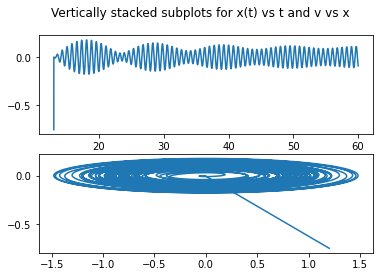

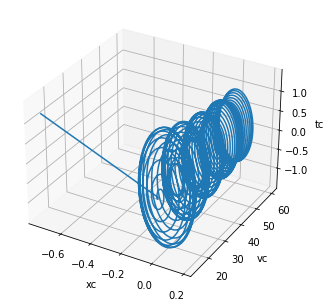

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def a(x,v,t):
    return -64*x - 0.1*v + np.sin(8.6*t)
x = 0
v = 0
x_0 = -0.75
v_0 = 1.2
h = 0.01
t = 13
xc = []
xc.append(x_0)
vc = []
vc.append(v_0)
tc = []
tc.append(t)
while t <= 60:
    k1v = a(x,v,t)*h
    k1x = v*h
   
    k2v = a(x+k1x/2, v+k1v/2, t+h/2)*h
    k2x = (v+k1v/2)*h
   
    k3v = a(x + k2x/2, v+k2v/2, t+h/2)*h
    k3x = (v + k2v/2)*h
   
    k4v = a(x+k3x,v+k3v, t+h)*h
    k4x = (v + k3v)*h

    v += (k1v+2*k2v+2*k3v+k4v)/6
    x += (k1x+2*k2x+2*k3x+k4x)/6
   
    xc.append(x)
    vc.append(v)

    t += h
    
    tc.append(t)
    
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots for x(t) vs t and v vs x')

ax1.plot(tc, xc)

ax2.plot(vc, xc)


fig1 = plt.figure()
ax = Axes3D(fig1)
ax.set_xlabel('xc')
ax.set_ylabel('vc')
ax.set_zlabel('tc')
ax.plot(xc,tc,zs = vc, zdir='z')

X oscillates between ~-0.2 to ~0.2 with time t between 13 to 60s <br>
v oscillates between ~-1.5 to ~1.5 and x also oscillates between ~-0.2 to ~0.2 <br>


C:\Users\14694\AppData\Local\Temp\ipykernel_18812\3960143102.py:52: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig1)


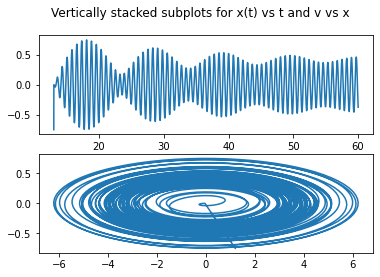

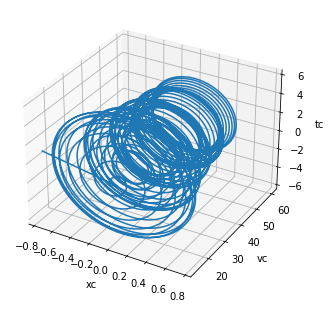

In [3]:
#with driving force = 4.2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def a(x,v,t):
    return -64*x - 0.1*v + (4.2*np.sin(8.6*t))
x = 0
v = 0
x_0 = -0.75
v_0 = 1.2
h = 0.01
t = 13
xc = []
xc.append(x_0)
vc = []
vc.append(v_0)
tc = []
tc.append(t)
while t <= 60:
    k1v = a(x,v,t)*h
    k1x = v*h
   
    k2v = a(x+k1x/2, v+k1v/2, t+h/2)*h
    k2x = (v+k1v/2)*h
   
    k3v = a(x + k2x/2, v+k2v/2, t+h/2)*h
    k3x = (v + k2v/2)*h
   
    k4v = a(x+k3x,v+k3v, t+h)*h
    k4x = (v + k3v)*h

    v += (k1v+2*k2v+2*k3v+k4v)/6
    x += (k1x+2*k2x+2*k3x+k4x)/6
   
    xc.append(x)
    vc.append(v)

    t += h
    
    tc.append(t)
    
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots for x(t) vs t and v vs x')

ax1.plot(tc, xc)

ax2.plot(vc, xc)


fig1 = plt.figure()
ax = Axes3D(fig1)
ax.set_xlabel('xc')
ax.set_ylabel('vc')
ax.set_zlabel('tc')
ax.plot(xc,tc,zs = vc, zdir='z')

X oscillates between ~-0.5 to ~0.5 with time t between 13 to 60s <br>
v oscillates between ~-6 to ~6 and x also oscillates between ~-0.5 to ~0.5 